In [229]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [230]:
import lightgbm as lgb

In [231]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [232]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [233]:
prom_train_upsampled = pd.read_csv('train_SMOTEsampled.csv')
prom_train_upsampled.head(4)

,Qualification,Gender,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,...,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Age,Length_of_Service,No_of_previous_employers,Promoted_or_Not
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.314329,0.0,0.0,0.0,0.580645,0.507890,0.000000,0.0
1,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.548535,1.0,0.0,0.0,0.449403,0.320356,0.000000,0.0
2,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.339386,1.0,0.0,0.0,0.557333,0.470199,0.000000,0.0
3,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.339386,1.0,0.0,0.0,0.662555,0.572618,0.166667,0.0


In [234]:
from xgboost import XGBClassifier
from vecstack import stacking

In [235]:
prom_train_upsampled.shape

(38312, 35)

In [236]:
#from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt

#array = prom_train_upsampled.values
#X = array[:,0:34].astype(float)

#pca = PCA(n_components=2)
#X = pca.fit_transform(X)
#X.shape

In [237]:
# Split-out validation dataset
array = prom_train_upsampled.values
df_HR = array[:,0:34].astype(float)
target = array[:,34]
X_train, X_val, y_train, y_val = train_test_split(df_HR,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=7)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_val dataset: ", X_val.shape)
print("Number transactions y_val dataset: ", y_val.shape)

Number transactions X_train dataset:  (30649, 34)
Number transactions y_train dataset:  (30649,)
Number transactions X_val dataset:  (7663, 34)
Number transactions y_val dataset:  (7663,)


In [238]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=7, ratio='minority')
X_train, y_train = sm.fit_sample(X_train, y_train)

In [239]:
#from imblearn.combine import SMOTETomek

#smt = SMOTETomek(ratio='auto')
#X_train, y_train = smt.fit_sample(X_train, y_train)

In [240]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_val dataset: ", X_val.shape)
print("Number transactions y_val dataset: ", y_val.shape)

Number transactions X_train dataset:  (56102, 34)
Number transactions y_train dataset:  (56102,)
Number transactions X_val dataset:  (7663, 34)
Number transactions y_val dataset:  (7663,)


In [331]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Random Forest', RandomForestClassifier(max_depth = 25, min_samples_leaf = 1, min_samples_split = 2,
    n_estimators=170, random_state=7)))

models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))

models.append(('XGB',
               XGBClassifier(random_state=7, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)))

models.append(('LGBMClassifier',
               lgb.LGBMClassifier(random_state=7,boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.0001, n_estimators=100, 
subsample_for_bin=200000, objective='binary', class_weight=None, min_split_gain=0.0, min_child_weight=0.001, 
min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, 
n_jobs=-1, silent=True, importance_type='split')))


In [332]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [333]:
acc_results = []
#auc_results = []
names = []
# set table to table to populate with performance results
#col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       #'Accuracy Mean', 'Accuracy STD']
col = ['Algorithm', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')
    #cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        #model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    #auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         #round(cv_auc_results.mean()*100, 2),
                         #round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
#df_results.sort_values(by=['ROC AUC Mean'], ascending=False)
df_results.sort_values(by=['Accuracy Mean'], ascending=False)


,Algorithm,Accuracy Mean,Accuracy STD
0,Random Forest,96.62,2.75
1,Decision Tree Classifier,93.61,4.49
2,XGB,92.60,1.59
3,LGBMClassifier,8.50,12.03


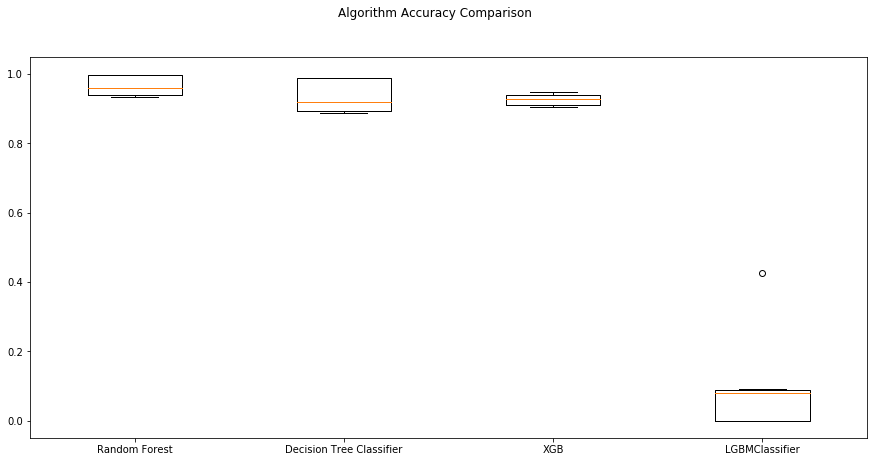

In [334]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

In [335]:
# create the ensemble model
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(models)#, voting='soft', weights = [2,1,1]
results = cross_val_score(  # accuracy scoring
        ensemble, X_train, y_train, cv=kfold, scoring='accuracy')
print(round(results.mean()*100, 2))

93.44


In [336]:
from sklearn.metrics import f1_score
model_ens = ensemble.fit(X_train, y_train)
predictions = model_ens.predict(X_val)
print(accuracy_score(y_val, predictions))
print(f1_score(y_val, predictions))
print(classification_report(y_val, predictions))
print('Accuracy of Ensemble model on test set: {:.2f}'.format(model_ens.score(X_val, y_val)*100))


0.9308364870155291
0.418859649122807
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      7020
         1.0       0.71      0.30      0.42       643

    accuracy                           0.93      7663
   macro avg       0.82      0.64      0.69      7663
weighted avg       0.92      0.93      0.92      7663

Accuracy of Ensemble model on test set: 93.08


In [337]:
rfc = RandomForestClassifier(max_depth = 25, min_samples_leaf = 1, min_samples_split = 2,
    n_estimators=170, random_state=7)
model_rfc = rfc.fit(X_train, y_train)
predictions = model_rfc.predict(X_val)
print(accuracy_score(y_val, predictions))
print(f1_score(y_val, predictions))
print(classification_report(y_val, predictions))
print('Accuracy of Random Forest model on test set: {:.2f}'.format(model_rfc.score(X_val, y_val)*100))

0.9260080908260473
0.40875912408759124
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      7020
         1.0       0.62      0.30      0.41       643

    accuracy                           0.93      7663
   macro avg       0.78      0.64      0.68      7663
weighted avg       0.91      0.93      0.91      7663

Accuracy of Random Forest model on test set: 92.60


In [338]:
cart =  DecisionTreeClassifier(random_state=7)
model_cart = cart.fit(X_train, y_train)
predictions = model_cart.predict(X_val)
print(accuracy_score(y_val, predictions))
print(f1_score(y_val, predictions))
print(classification_report(y_val, predictions))
print('Accuracy of CART model on test set: {:.2f}'.format(model_cart.score(X_val, y_val)*100))

0.889077384836226
0.4113573407202217
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      7020
         1.0       0.37      0.46      0.41       643

    accuracy                           0.89      7663
   macro avg       0.66      0.70      0.68      7663
weighted avg       0.90      0.89      0.89      7663

Accuracy of CART model on test set: 88.91


In [339]:
xgb = XGBClassifier(random_state=7, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
model_xgb = xgb.fit(X_train, y_train)
predictions = model_xgb.predict(X_val)
print(accuracy_score(y_val, predictions))
print(f1_score(y_val, predictions))
print(classification_report(y_val, predictions))
print('Accuracy of XGB model on test set: {:.2f}'.format(model_xgb.score(X_val, y_val)*100))

0.917786767584497
0.4144981412639405
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      7020
         1.0       0.52      0.35      0.41       643

    accuracy                           0.92      7663
   macro avg       0.73      0.66      0.69      7663
weighted avg       0.91      0.92      0.91      7663

Accuracy of XGB model on test set: 91.78


In [340]:
lgbm =lgb.LGBMClassifier(boosting_type= 'dart', class_weight= None, colsample_bytree= 0.880683867295047, learning_rate= 0.19551187838964745, min_child_samples= 435, num_leaves= 45, reg_alpha= 0.2878847550683644, reg_lambda= 0.01708657132205149,
                                  subsample_for_bin= 240000, subsample= 0.5170383307975128)
model_lgbm = lgbm.fit(X_train, y_train)
predictions = model_lgbm.predict(X_val)
print(accuracy_score(y_val, predictions))
print(f1_score(y_val, predictions))
print(classification_report(y_val, predictions))
print('Accuracy of LGBM model on test set: {:.2f}'.format(model_lgbm.score(X_val, y_val)*100))

0.9410152681717343
0.5
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      7020
         1.0       0.87      0.35      0.50       643

    accuracy                           0.94      7663
   macro avg       0.90      0.67      0.73      7663
weighted avg       0.94      0.94      0.93      7663

Accuracy of LGBM model on test set: 94.10


Text(0.5, 257.44, 'Predicted label')

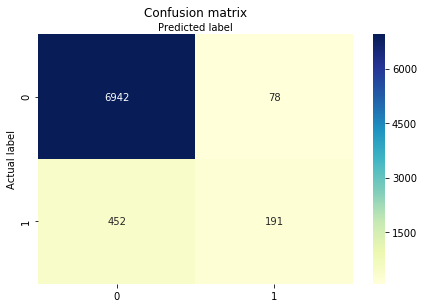

In [341]:

## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_val, model_ens.predict(X_val))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [342]:
import pandas as pd
prom_tested = pd.read_csv('Newtest_dataframe.csv')
prom_tested.head(3)

,Qualification,Gender,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,...,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Age,Length_of_Service,No_of_previous_employers
0,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.6,0.0,0.0,0.744125,1.0,0.0,0.0,0.801878,0.159042,0.166667
1,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.792796,1.0,0.0,0.0,0.473326,0.000000,0.166667
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.6,0.0,0.0,0.868480,1.0,0.0,0.0,0.657710,0.491797,0.166667


In [343]:
#prom_tested = prom_tested[['Trainings_Attended', 'Last_performance_score', 'Previous_Award']]

In [344]:
# X_test
array = prom_tested.values
X_test1 = array[:,0:34].astype(float)

In [345]:
prediction_test = model_ens.predict(X_test1)
#prediction_test = model_lgbm.predict(X_test1)
print(prediction_test)

[0. 0. 0. ... 0. 0. 0.]


In [346]:
prom_test = pd.read_csv('test.csv', index_col=None)
employee_id = prom_test['EmployeeNo']
Promotion = pd.DataFrame(prediction_test).astype('int')
model_predict = pd.concat([employee_id, Promotion],axis=1, ignore_index=True)
model_predict.columns = ['EmployeeNo', 'Promoted_or_Not']  #naming the dataframe columns
model_predict.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [347]:
#The data is exported for use in the exploration and clustering section
model_predict.to_csv (r'C:\Users\OLUMEGBON ISMAIL\Desktop\Jupyter\ismail_kaggle45.csv', index = None, header=True)

In [348]:
#(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, 
# subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, 
# min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, 
# random_state=None, n_jobs=-1, silent=True, importance_type='split', **kwargs)


#{'boosting_type': 'dart', 'class_weight': None, 'colsample_bytree': 0.880683867295047, 'learning_rate': 0.19551187838964745, 'min_child_samples': 435, 'num_leaves': 45, 'reg_alpha': 0.2878847550683644, 'reg_lambda': 0.01708657132205149, 'subsample_for_bin': 240000, 'subsample': 0.5170383307975128}
